In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import get_fin_data as gfd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
petr = gfd.get_close_price("PETR4.SA", "2021-01-01")
print(petr.head())

[*********************100%***********************]  1 of 1 completed
Date
2021-01-04    13.732212
2021-01-05    14.268963
2021-01-06    14.297462
2021-01-07    14.724960
2021-01-08    14.781960
Name: Adj Close, dtype: float64


In [24]:
# create random series to simulate and test functions

x = np.random.randn(100)/100
x = np.cumprod(1 + x)
x *= 5
x = pd.Series(x)

y = np.random.randn(100)/100
y = np.cumprod(1 + y) 
y *= 6
y = pd.Series(y)

print(x.head())
print(y.head())

0    5.109813
1    5.167650
2    5.080643
3    5.091791
4    5.097322
dtype: float64
0    6.030972
1    5.959782
2    6.040462
3    6.048598
4    5.919512
dtype: float64


In [14]:
### plot series


In [53]:
x_normalized = gfd.normalize_serie(x)
print(x_normalized.head())

y_normalized = gfd.normalize_serie(y)
print(y_normalized.tail())

0    0.921996
1    1.000000
2    0.882656
3    0.897690
4    0.905150
dtype: float64
95    0.146628
96    0.261199
97    0.157474
98    0.184692
99    0.286672
dtype: float64


In [54]:
spread = gfd.spread_serie(x_normalized, y_normalized)
print(spread.head())

0    1.171122
1    1.571644
2    1.055871
3    1.061285
4    1.501157
dtype: float64


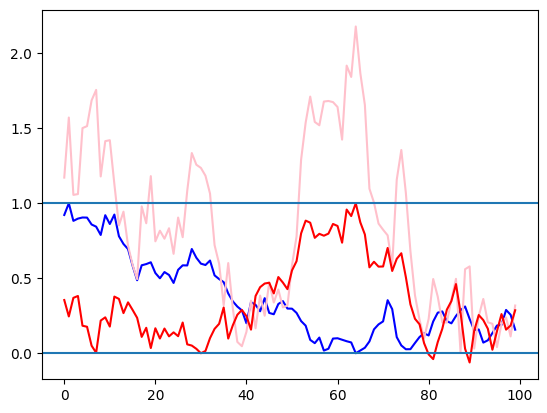

In [56]:
fig, ax = plt.subplots()
ax.plot(x_normalized.index, x_normalized, color="blue")
ax.plot(spread.index, spread, color="pink")
ax.plot(y_normalized.index, y_normalized, color="red")
ax.axhline(1)
ax.axhline(0)
plt.show()